<a href="https://colab.research.google.com/github/rupam1123/Enviromental_Sound_Classification_Deep-Learning-Group-soundify-/blob/main/data_preprocessing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.  ----Data Preprocessing

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/My Drive/UrbanSound8K/UrbanSound8K"
print(os.listdir(dataset_path))
 # here we are mounting gdrive to colab since the dataset is stored there..
print("success")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['.DS_Store', 'FREESOUNDCREDITS.txt', 'UrbanSound8K_README.txt', 'audio', 'metadata', 'extracted_features.pkl']
success


In [2]:
!pip install librosa
!pip install resampy
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd

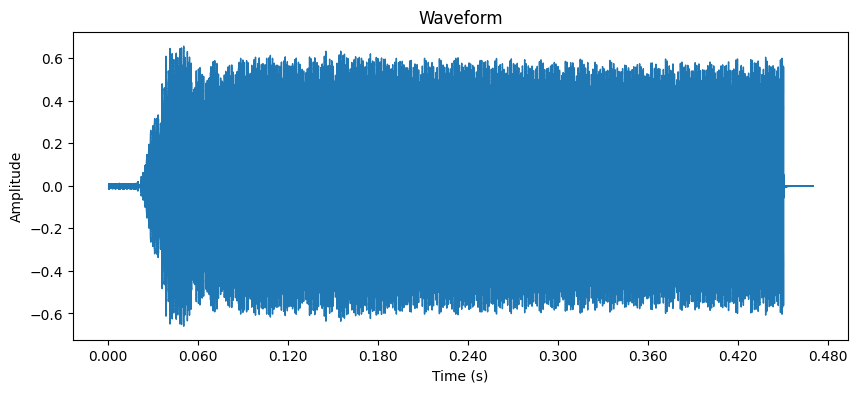

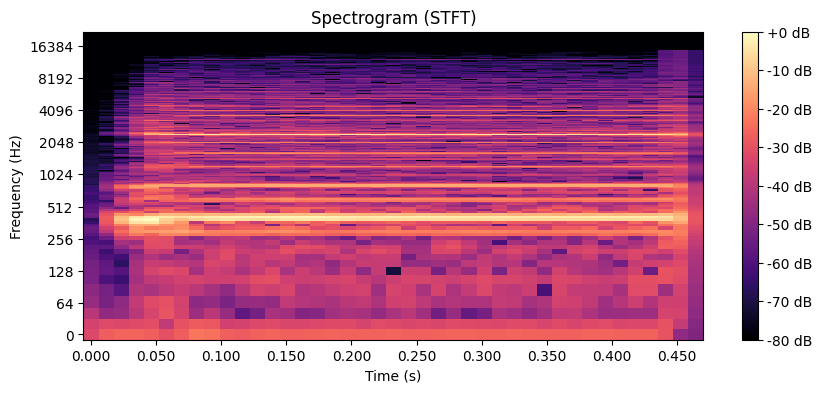

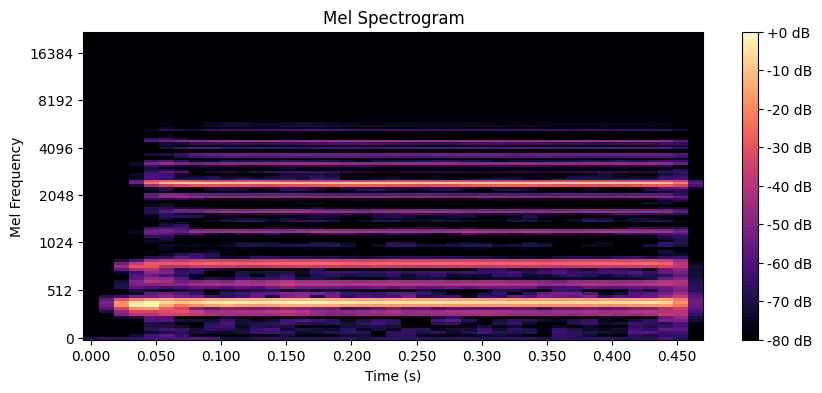

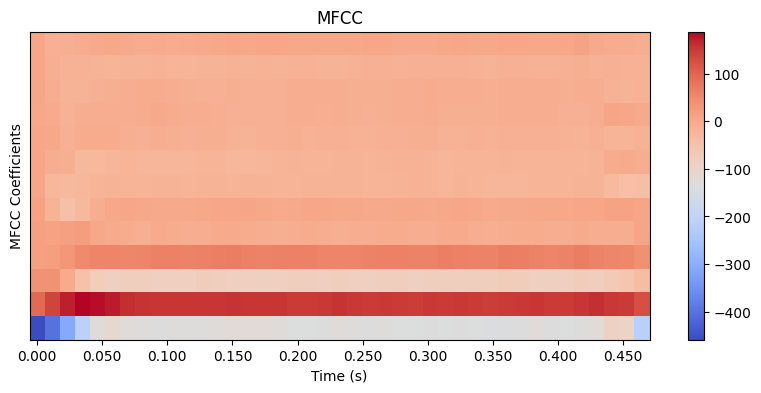

In [3]:
file_path = os.path.join(dataset_path, "audio/fold10/2937-1-0-0.wav")
audio, sr = librosa.load(file_path, sr=None)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
ipd.Audio(file_path)

# example test

#STFT
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (STFT)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

# Mel Spectrogram
plt.figure(figsize=(10, 4))
S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
S_db = librosa.amplitude_to_db(S, ref=np.max)
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")
plt.show()

# MFCC
plt.figure(figsize=(10, 4))
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
librosa.display.specshow(mfccs, sr=sr, x_axis="time")
plt.colorbar()
plt.title("MFCC")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()


In [4]:
sr

44100

In [5]:
metadata = pd.read_csv(os.path.join(dataset_path, 'metadata/UrbanSound8K.csv'))
metadata.head()


#metadata
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [6]:
metadata['class'].value_counts()
# here we can see the contents of each class

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
engine_idling,1000
jackhammer,1000
drilling,1000
siren,929
car_horn,429


# Features Extraction

Extract a log-mel spectrogram for each audio file in the dataset and store it into a Pandas DataFrame along with its class and fold label.

In [7]:
import os
import librosa
import numpy as np
from tqdm import tqdm

def features_extractor(file):
    """
    Extracts MFCC features from an audio file.

    Args:
        file (str): The path to the audio file.

    Returns:
        np.ndarray: The MFCC features.
    """
    try:
        audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

        return mfccs_features
    except Exception as e:
        print(f"Error processing file {file}: {e}")
        return None


def extract_features(metadata, dataset_path):
    """
    Extracts features (MFCCs) from a dataset using metadata.

    Args:
        metadata (DataFrame): The metadata containing file information.
        dataset_path (str): Path to the dataset directory.

    Returns:
        list: A list of extracted features and corresponding class labels.
    """
    extracted_features = []
    for index_num, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
        file_name = os.path.join(dataset_path, 'audio', f'fold{row["fold"]}', row["slice_file_name"])

        if os.path.exists(file_name):

            features = features_extractor(file_name)

            if features is not None:
                final_class_labels = row["class"]
                extracted_features.append([features, final_class_labels])
        else:
            print(f"Warning: File not found: {file_name}")

    return extracted_features
# feature extraction of each entry
print("done")

done


In [8]:
### converting extracted_features to Pandas dataframe
import resampy
extracted_features = extract_features(metadata, dataset_path)
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


  2%|▏         | 171/8732 [00:50<1:14:11,  1.92it/s]

  2%|▏         | 182/8732 [00:50<16:36,  8.58it/s]  

  3%|▎         | 237/8732 [01:16<1:01:10,  2.31it/s]

  7%|▋         | 569/8732 [03:53<1:06:46,  2.04it/s]

  8%|▊         | 738/8732 [05:15<56:21,  2.36it/s]  

  9%|▉         | 808/8732 [05:43<1:03:47,  2.07it/s]

 11%|█         | 939/8732 [06:41<55:09,  2.35it/s]

 11%|█         | 951/8732 [06:45<53:56,  2.40it/s]

 14%|█▎        | 1199/8732 [08:41<1:04:17,  1.95it/s]

 14%|█▍        | 1212/8732 [08:45<1:05:06,  1.93it/s]

 17%|█▋        | 1497/8732 [11:04<49:31,  2.43it/s]

 17%|█▋        | 1524/8732 [11:13<49:31,  2.43it/s]

 22%|██▏       | 1949/8732 [14:41<1:24:48,  1.33it/s]

 25%|██▌       | 2213/8732 [16:51<44:51,  2.42it/s]

 26%|██▌       | 2254/8732 [17:08<55:36,  1.94it/s]

 26%|██▌       | 2272/8732 [17:14<49:27,  2.18it/s]

 26%|██▌       | 2288/8732 [17:17<38:39,  2.78it/s]

 27%|██▋       | 2314/8732 [17:25<41:56,  2.55it/s]

 30%|███       | 2621/8732 [19:40<47:06,  2.16it/s]

 32%|███▏      | 2796/8732 [20:51<44:42,  2.21it/s]

 33%|███▎      | 2900/8732 [21:42<45:59,  2.11it/s]

 34%|███▎      | 2946/8732 [21:43<03:14, 29.77it/s]

 35%|███▍      | 3025/8732 [22:14<53:10,  1.79it/s]

 35%|███▍      | 3045/8732 [22:20<42:04,  2.25it/s]

 37%|███▋      | 3194/8732 [23:30<45:20,  2.04it/s]

 37%|███▋      | 3243/8732 [23:51<39:15,  2.33it/s]

 38%|███▊      | 3298/8732 [24:06<47:26,  1.91it/s]

 39%|███▊      | 3372/8732 [24:40<46:13,  1.93it/s]

 40%|████      | 3510/8732 [25:37<33:19,  2.61it/s]

 41%|████      | 3541/8732 [25:45<35:35,  2.43it/s]

 41%|████      | 3555/8732 [25:48<27:08,  3.18it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
 41%|████      | 3570/8732 [25:55<50:14,  1.71it/s]

 43%|████▎     | 3742/8732 [27:15<47:37,  1.75it/s]

 43%|████▎     | 3766/8732 [27:26<44:13,  1.87it/s]

 44%|████▍     | 3857/8732 [27:56<38:53,  2.09it/s]

 46%|████▌     | 4023/8732 [29:10<41:29,  1.89it/s]

 46%|████▌     | 4037/8732 [29:13<28:35,  2.74it/s]

 49%|████▉     | 4291/8732 [31:07<34:38,  2.14it/s]

 49%|████▉     | 4315/8732 [31:18<42:23,  1.74it/s]

 51%|█████     | 4425/8732 [31:33<33:31,  2.14it/s]

 51%|█████     | 4435/8732 [31:33<09:01,  7.93it/s]

 53%|█████▎    | 4657/8732 [33:18<26:02,  2.61it/s]

 53%|█████▎    | 4665/8732 [33:19<07:50,  8.65it/s]

 53%|█████▎    | 4667/8732 [33:19<10:49,  6.26it/s]

 56%|█████▌    | 4863/8732 [34:54<39:26,  1.64it/s]

 56%|█████▌    | 4883/8732 [35:00<28:48,  2.23it/s]

 56%|█████▌    | 4894/8732 [35:03<29:29,  2.17it/s]

 56%|█████▋    | 4927/8732 [35:16<31:03,  2.04it/s]

 57%|█████▋    | 4948/8732 [35:24<29:47,  2.12it/s]

 58%|█████▊    | 5064/8732 [36:17<24:29,  2.50it/s]

 58%|█████▊    | 5081/8732 [36:24<29:39,  2.05it/s]

 59%|█████▊    | 5122/8732 [36:43<29:38,  2.03it/s]

 59%|█████▉    | 5181/8732 [37:06<31:36,  1.87it/s]

 60%|█████▉    | 5237/8732 [37:18<25:58,  2.24it/s]

 60%|██████    | 5266/8732 [37:29<24:33,  2.35it/s]

 61%|██████    | 5306/8732 [37:46<28:23,  2.01it/s]

 63%|██████▎   | 5493/8732 [38:41<24:40,  2.19it/s]

 77%|███████▋  | 6753/8732 [48:49<12:38,  2.61it/s]

 77%|███████▋  | 6764/8732 [48:53<14:49,  2.21it/s]

 84%|████████▎ | 7297/8732 [53:14<12:01,  1.99it/s]

 84%|████████▍ | 7354/8732 [53:39<10:38,  2.16it/s]

 90%|████████▉ | 7850/8732 [57:47<06:47,  2.17it/s]

 95%|█████████▌| 8326/8732 [1:01:46<03:45,  1.80it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
 95%|█████████▌| 8329/8732 [1:01:47<03:01,  2.22it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
 98%|█████████▊| 8561/8732 [1:03:50<01:12,  2.34it/s]

 99%|█████████▊| 8619/8732 [1:04:12<00:56,  1.99it/s]

100%|██████████| 8732/8732 [1:05:02<00:00,  2.24it/s]


,feature,class
0,"[[-335.0899, -176.70966, -98.33869, -65.15997,...",dog_bark
1,"[[-492.1376, -455.06793, -449.95038, -444.2668...",children_playing
2,"[[-496.66345, -471.2096, -479.95898, -485.4825...",children_playing
3,"[[-447.43988, -412.1046, -408.45084, -408.2987...",children_playing
4,"[[-473.87814, -438.34927, -442.38864, -441.715...",children_playing


In [13]:
extracted_features_df = pd.read_pickle("extracted_features.pkl")

# Use pickle.dump to save the list to a file

In [14]:
# uploading the pickel file

from google.colab import drive
import pickle
import os
drive.mount('/content/drive')
save_path = "/content/drive/My Drive/UrbanSound8K/UrbanSound8K/extracted_features.pkl"

with open(save_path, "wb") as f:
    pickle.dump(extracted_features, f)

print(f"Features saved to {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Features saved to /content/drive/My Drive/UrbanSound8K/UrbanSound8K/extracted_features.pkl
